In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import csv

## Munging Data
#### Loading Data

In [2]:
train = pd.read_csv('/home/fajrin/ML_29/titanic/train.csv')
test = pd.read_csv('/home/fajrin/ML_29/titanic/test.csv')
full = pd.concat([train , test])

/home/fajrin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
print(train.describe())
print('=='*40)
print(train.info())
print('=='*40)
print(train.isnull().any())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

#### Filling missing value
- Filling Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

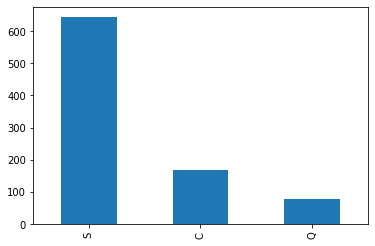

In [4]:
# there are three missing value are including embarked ,cabin , age
display(train.Embarked.value_counts())
train.Embarked.value_counts().plot(kind='bar')

In [5]:
display(train[train.Embarked.isnull()])
# So I assume the they are both form Southmapton
train.Embarked.fillna(value ='S' ,inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- Filling Missing age

we assume that we can categorize the missing age with the title , its indicate the age's person

In [6]:
data = train.Name.str.replace('(.*,)|(\\..*)' , '')
train['Title'] = data


In [7]:
train[train.Title=='Mr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [8]:
train.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Sir               1
 Jonkheer          1
 Mme               1
 the Countess      1
 Capt              1
 Lady              1
 Don               1
 Ms                1
Name: Title, dtype: int64

In [9]:
train[train.Age.isnull()].Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Dr'], dtype=object)

In [10]:
train.loc[train.Title=='Ms' ,'Title']='Mrs'

In [11]:
train.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Sir               1
 Jonkheer          1
 Mme               1
 the Countess      1
 Capt              1
 Lady              1
 Don               1
 Ms                1
Name: Title, dtype: int64

## Feature Engineering

#### Cabin Side



In [12]:
# now lets modify the cabin with feature engineering
def cabin_modify ( df):
    df['Cabinside'] ='Unknown'
    evenlist= ['1','3','5','7','9']
  

In [13]:
def cabin_side(df):
    df['Cabinside']='Unknown'
    df.loc[df.Cabin.notnull() & df['Cabin'].str[-1].isin(['1','3', '5','7','9']) 
              , 'Cabinside'] = 'Startboard'
    df.loc[df.Cabin.notnull() & df['Cabin'].str[-1].isin(['2' ,'4','6','8']), 
             'Cabinside'] = 'Port'
    return df

In [14]:
cabin_side(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabinside
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Startboard
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Startboard
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Port
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Port


Lower deck cabins where flooded with water before the higher level deck. Is it natural to think that passengers on low decks gathered to the lifeboats earlier than the passengers at the higher decks? At least I will try out a feature based on the deck. The deck is labeld as the first letter in the cabin number. A-G, where A is the highest and G is the lowest.

In [15]:
# categorize the the deck number based on the Cabin number

def deck_group(df):
    df['Deck']='Unknown'
    df.loc[df.Cabin.notnull() , 'Deck'] = df.Cabin.str[0]
    return df

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Deck, dtype: int64

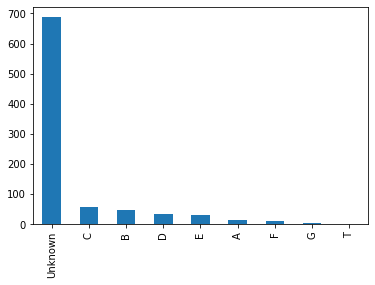

In [16]:
deck_group(train)
train.Deck.value_counts().plot(kind='bar')
train.Deck.value_counts()

In [17]:
train[train.Deck=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabinside,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,Unknown,T


### Family size Feature

In [18]:
train['Familysize'] = train.SibSp + train.Parch + 1
data = np.array(train.Familysize)
lista =[]
for i in data :
    if i >1 :
        lista.append(1)
    elif i==1:
        lista.append(0)
train['Alone']=lista 


In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabinside,Deck,Familysize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown,Unknown,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Startboard,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown,Unknown,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Startboard,C,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown,Unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Unknown,Unknown,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Port,B,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Unknown,Unknown,4,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Port,C,1,0


Alone  Survived
0      0           374
       1           163
1      1           179
       0           175
Name: Survived, dtype: int64


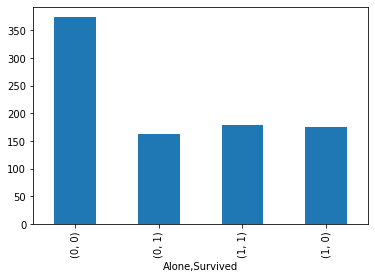

In [20]:
print(train.Survived.groupby(by=train.Alone).value_counts())
train.Survived.groupby(by=train.Alone).value_counts().plot(kind='bar')

so we assumed that the number of survivor  whose family is the highest number in the titanic

In [21]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabinside,Deck,Familysize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown,Unknown,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Startboard,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown,Unknown,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Startboard,C,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown,Unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Unknown,Unknown,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Port,B,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Unknown,Unknown,4,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Port,C,1,0


### Feature Preparation
- Feature normalizer

In [22]:
def feature_normalizer(df):
    col_name = ["Age", "SibSp", "Parch", "Familysize", "Fare"]
    for i in col_name:
        mean = df[i].mean()
        stdv = df[i].std()
        df[i,'Normalize']= (df[i]-mean)/stdv
    return df

In [23]:
feature_normalizer(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Cabinside,Deck,Familysize,Alone,"(Age, Normalize)","(SibSp, Normalize)","(Parch, Normalize)","(Familysize, Normalize)","(Fare, Normalize)"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,Unknown,Unknown,2,1,-0.530005,0.432550,-0.473408,0.059127,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,Startboard,C,2,1,0.571430,0.432550,-0.473408,0.059127,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,Unknown,Unknown,1,0,-0.254646,-0.474279,-0.473408,-0.560660,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,Startboard,C,2,1,0.364911,0.432550,-0.473408,0.059127,0.420494
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,Unknown,Unknown,1,0,0.364911,-0.474279,-0.473408,-0.560660,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,Rev,Unknown,Unknown,1,0,-0.185807,-0.474279,-0.473408,-0.560660,-0.386454
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,Miss,Port,B,1,0,-0.736524,-0.474279,-0.473408,-0.560660,-0.044356
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,Miss,Unknown,Unknown,4,1,NaN,0.432550,2.007806,1.298700,-0.176164
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,Mr,Port,C,1,0,-0.254646,-0.474279,-0.473408,-0.560660,-0.044356


### Categorical Features

In [24]:
# now we try to categorize the title of passengers
train.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Sir               1
 Jonkheer          1
 Mme               1
 the Countess      1
 Capt              1
 Lady              1
 Don               1
 Ms                1
Name: Title, dtype: int64

In [25]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Cabinside,Deck,Familysize,Alone,"(Age, Normalize)","(SibSp, Normalize)","(Parch, Normalize)","(Familysize, Normalize)","(Fare, Normalize)"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,Mr,Unknown,Unknown,2,1,-0.530005,0.43255,-0.473408,0.059127,-0.502163


In [26]:
dummies_sex = pd.get_dummies(train.Sex)
data = train[['PassengerId' ,'Survived','Pclass','Age','SibSp','Parch','Fare','Familysize','Alone']]


In [27]:
inputs = pd.concat([data , dummies_sex],axis ='columns')

In [28]:
inputs.drop('male' ,axis='columns' , inplace=True)

In [29]:
inputs

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Familysize,Alone,female
0,1,0,3,22.0,1,0,7.2500,2,1,0
1,2,1,1,38.0,1,0,71.2833,2,1,1
2,3,1,3,26.0,0,0,7.9250,1,0,1
3,4,1,1,35.0,1,0,53.1000,2,1,1
4,5,0,3,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,0
887,888,1,1,19.0,0,0,30.0000,1,0,1
888,889,0,3,NaN,1,2,23.4500,4,1,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [30]:
inputs.Age = inputs.Age.fillna(inputs.Age.median())

In [31]:
inputs.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Familysize,Alone,female
0,1,0,3,22.0,1,0,7.2500,2,1,0
1,2,1,1,38.0,1,0,71.2833,2,1,1
2,3,1,3,26.0,0,0,7.9250,1,0,1
3,4,1,1,35.0,1,0,53.1000,2,1,1
4,5,0,3,35.0,0,0,8.0500,1,0,0


In [32]:
X = inputs.drop('Survived' , axis=1 )
Y = inputs['Survived']

In [33]:
x_train , x_test , y_train , y_test = train_test_split(X ,Y , test_size = 0.30, 
                                                      random_state = 20)

In [34]:
model= GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
model.score(x_test,y_test)

0.7947761194029851

In [36]:
model.score(x_train , y_train)

0.7913322632423756

In [37]:
display(x_test[0:10])
model.predict(x_test[0:10])

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Familysize,Alone,female
347,348,3,28.0,1,0,16.1000,2,1,1
674,675,2,28.0,0,0,0.0000,1,0,0
791,792,2,16.0,0,0,26.0000,1,0,0
836,837,3,21.0,0,0,8.6625,1,0,0
56,57,2,21.0,0,0,10.5000,1,0,1
62,63,1,45.0,1,0,83.4750,2,1,0
762,763,3,20.0,0,0,7.2292,1,0,0
561,562,3,40.0,0,0,7.8958,1,0,0
383,384,1,35.0,1,0,52.0000,2,1,1
881,882,3,33.0,0,0,7.8958,1,0,0


array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [38]:
len(x_test)

268

In [39]:
model.predict(x_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0])

In [40]:
x_test['Predict']= model.predict(x_test)

/home/fajrin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Familysize,Alone,female,Predict
347,348,3,28.0,1,0,16.1000,2,1,1,1
674,675,2,28.0,0,0,0.0000,1,0,0,0
791,792,2,16.0,0,0,26.0000,1,0,0,0
836,837,3,21.0,0,0,8.6625,1,0,0,0
56,57,2,21.0,0,0,10.5000,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
222,223,3,51.0,0,0,8.0500,1,0,0,0
543,544,2,32.0,1,0,26.0000,2,1,0,0
613,614,3,28.0,0,0,7.7500,1,0,0,0
541,542,3,9.0,4,2,31.2750,7,1,1,0


In [43]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Familysize,Alone,female,Predict
347,348,3,28.0,1,0,16.1000,2,1,1,1
674,675,2,28.0,0,0,0.0000,1,0,0,0
791,792,2,16.0,0,0,26.0000,1,0,0,0
836,837,3,21.0,0,0,8.6625,1,0,0,0
56,57,2,21.0,0,0,10.5000,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
222,223,3,51.0,0,0,8.0500,1,0,0,0
543,544,2,32.0,1,0,26.0000,2,1,0,0
613,614,3,28.0,0,0,7.7500,1,0,0,0
541,542,3,9.0,4,2,31.2750,7,1,1,0


In [44]:
df = x_test.copy()

In [46]:
df[df.PassengerId == df.PassengerId.max()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Familysize,Alone,female,Predict
890,891,3,32.0,0,0,7.75,1,0,0,0


In [57]:
df.PassengerId[df.Fare ==df.Fare.max()]

679    680
Name: PassengerId, dtype: int64